In [23]:
#Descargar el archivo
from google.colab import files 
uploaded = files.upload()

Saving employees.csv to employees (1).csv


In [24]:
#leer el archivo
import numpy as np
import pandas as pd 
import io 

  
df = pd.read_csv(io.BytesIO(uploaded['employees.csv'])) 
print(df)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2        

In [25]:
#identificar datos faltantes, true significa que es un dato nulo
datos_faltantes=df.isnull()
datos_faltantes.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [26]:
#identificar valores faltantes por cada fila
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)


First Name            67
Gender               145
Senior Management     67
Team                  43
dtype: int64


In [27]:
# tipo de datos
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [28]:
# eliminamos los campos que tenia first name vacio ya que solo eran 67 y creo  que no afectara en el analisis de 
#de los datos, ademas al eliminarlos nos dimos cuenta que los que no tenian nombre tampoco tenian Senior Management
# Y asi facilitamos nuestro analisis
df.dropna(subset=["First Name"], axis=0,inplace=True)
df.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN


In [29]:
# volvemos a revisar los datos nulos y nos damos cuenta que aun nos quedan nulos en gender y team
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

Gender    138
Team       34
dtype: int64


In [30]:
# revisamos que valores cantidad de valores tiene cada genero
from pandas.core.arrays.interval import value_counts
df['Gender'].value_counts()


Female    400
Male      395
Name: Gender, dtype: int64

In [31]:
#Remplazamos los campos donde no hay genero pot " No gender " para asi mantener la 
#proporcion en los datos de tipo genero cuando se evaluen con otra estadistica
df["Gender"].replace(np.nan,"No gender", inplace=True)

 

In [32]:
# revisamos que valores cantidad de valores tiene cada genero
from pandas.core.arrays.interval import value_counts
df['Gender'].value_counts()


Female       400
Male         395
No gender    138
Name: Gender, dtype: int64

In [33]:
# revisamos que valores cantidad de valores tiene cada genero
from pandas.core.arrays.interval import value_counts
df['Team'].value_counts()

Client Services         100
Business Development     99
Finance                  97
Product                  92
Marketing                91
Legal                    86
Engineering              86
Sales                    86
Human Resources          85
Distribution             77
Name: Team, dtype: int64

In [34]:
#eliminamos los campos que no tienen "team" ya que no se podian remplzar por la media
#de los datos ya que todos los team tienen valores muy igualados
df.dropna(subset=["Team"], axis=0, inplace=True)

In [35]:
# volvemos a revisar los datos y observamos que ya no nos quedan datos nulos
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

Series([], dtype: int64)


In [36]:
# solo se elimino un 10% de los datos
df.shape

(899, 8)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

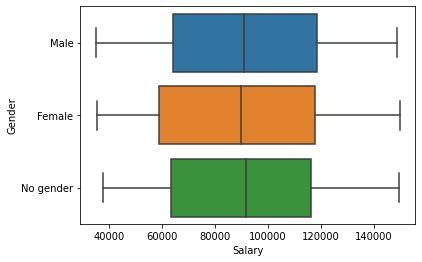

In [38]:
# Podemos observar que entre las dos variables salario y genero, el salario en cuanto a los generos esta equilibrado
# con una pequrña difirencia que el rango de salario de las mujeres empieza en un salario mas bajo que el de los demas generos

sns.boxplot(x="Salary", y="Gender",data=df)


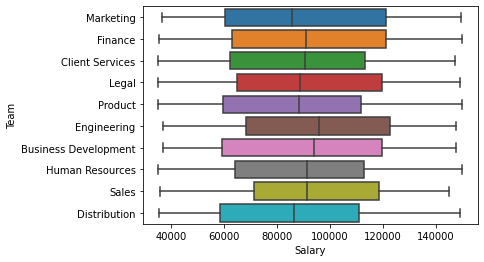

In [39]:
#Podemos obser que la media de los salarios esta entre 80000 y 10000; el team distribution esta entre los que menos ganan junto a human resources
#product, y client services. Y en el rango de los que mas ganan esta el team Engineering y bussines development
sns.boxplot(x="Salary", y="Team",data=df)

In [40]:
df.describe()

,Salary,Bonus %
count,899.000000,899.000000
mean,90479.672970,10.200201
std,32743.875488,5.551621
min,35013.000000,1.015000
25%,62412.500000,5.267000
50%,90730.000000,9.770000
75%,118107.500000,14.868500
max,149908.000000,19.944000
